In [3]:
import pandas as pd
import datetime as dt
dataset = pd.read_csv("Tatacoffee13_21.csv", index_col="Date")

In [19]:
# start = dt.datetime(2013,1,1)
# end = dt.datetime(2024,12,31)

In [20]:
# dataset = yf.download('HDFCBANK.NS', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [24]:
# dataset.columns = dataset.columns.droplevel(1)

In [4]:
dataset

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [6]:
from datetime import date, timedelta
import pandas as pd

In [27]:
start_date = pd.to_datetime("2013-01-01")
end_date = pd.to_datetime("2024-02-04") - timedelta(days=1827)

In [28]:
end_date

Timestamp('2019-02-03 00:00:00')

In [29]:
all_date = pd.date_range(start_date, end_date, freq='d')

In [30]:
dummyDate=dataset

In [31]:
dummyDate.index=all_date

In [32]:
dummyDate

,Open,High,Low,Close
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-05,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2019-01-30,202.90,207.80,201.35,205.00
2019-01-31,206.00,206.85,202.05,202.95
2019-02-01,203.90,203.90,199.35,201.00
2019-02-02,200.00,222.00,196.00,218.35


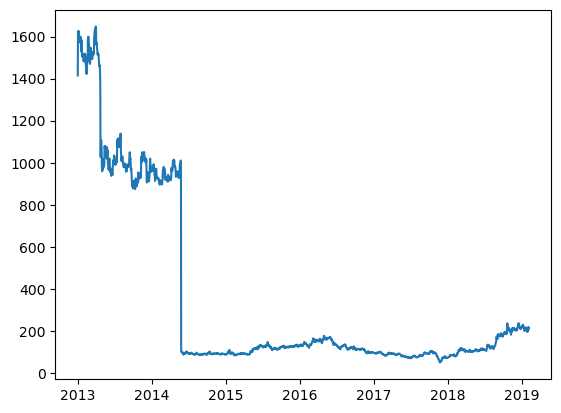

In [33]:
import matplotlib.pyplot as plt
plt.plot(dataset["Close"])

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
result = seasonal_decompose(dummyDate['Close'], model='multicaptive')

<Figure size 1600x500 with 0 Axes>

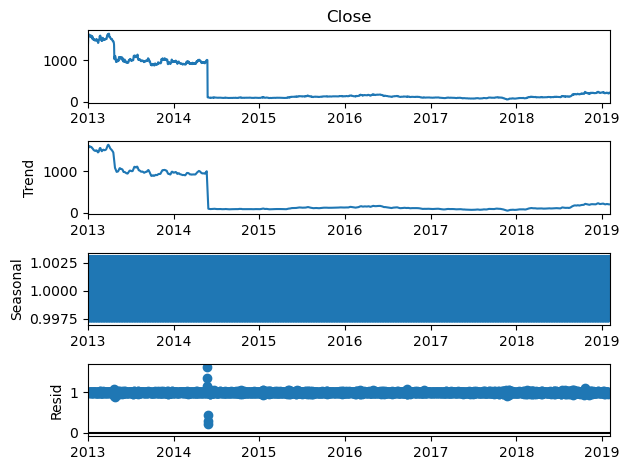

In [36]:
plt.figure(figsize=(16,5))
result.plot()
plt.show()

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
def adf_test(timeseries,df,pollutant):
    plt.figure(figsize=(16,5))
    
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries,autolag="AIC")
    print("******************")
    print(dftest)
    print("******************")
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(dfoutput)
    print("******************")

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    print("******************")

    ans=dfoutput
    print("Condition:")
    print("p-value<=0.05-->Accept Alternate Hypothesis")
    print("p-value>0.05-->Accept Null Hypothesis")
    if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Reject null hypothesis:Non Stationarity")
        print("Accept Alternate hypothesis:Staionarity ")
        message="Stationarity based on ADH"
    else:
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADH"
        
    plt.plot(df.index, df[pollutant], label = pollutant)
    plt.legend(loc='best')
    plt.title("{}_{}_2013 to 2021".format(message,pollutant))
    plt.savefig("{}_ADH.png".format(pollutant))
    plt.show()
    
    return message

Results of Dickey-Fuller Test:
******************
(-3.007236327367315, 0.03422412229093029, 1, 2223, {'1%': -3.433295059438173, '5%': -2.8628410403669844, '10%': -2.5674626062113077}, 19813.538287196585)
******************
Test Statistic                   -3.007236
p-value                           0.034224
#Lags Used                        1.000000
Number of Observations Used    2223.000000
dtype: float64
******************
Test Statistic                   -3.007236
p-value                           0.034224
#Lags Used                        1.000000
Number of Observations Used    2223.000000
Critical Value (1%)              -3.433295
Critical Value (5%)              -2.862841
Critical Value (10%)             -2.567463
dtype: float64
******************
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Reject null hypothesis:Non Stationarity
Accept Alternate h

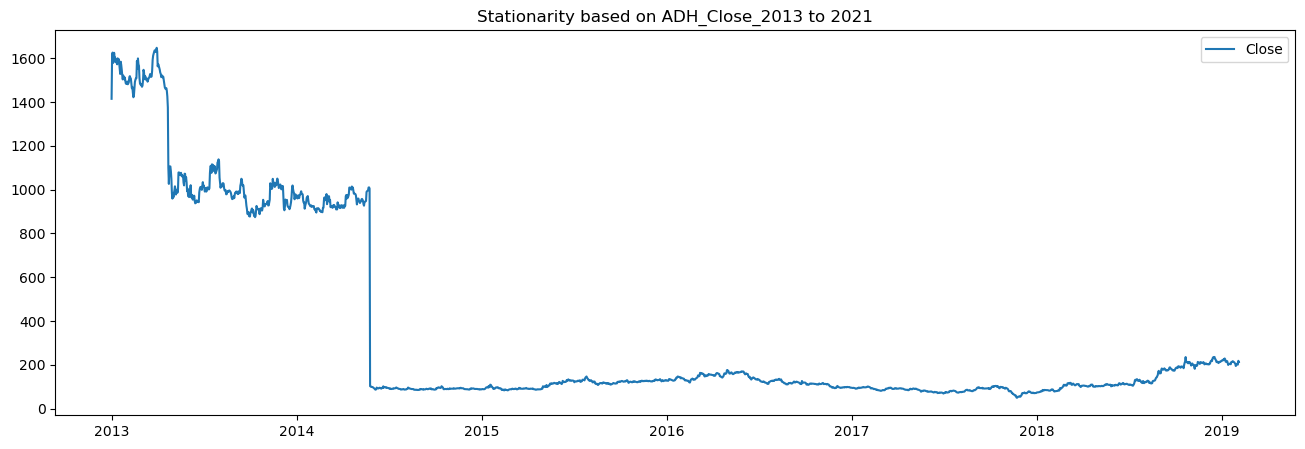

'Stationarity based on ADH'

In [39]:
adf_test(dataset["Close"],dataset,"Close")

the adfuller analysis has given us that the dataset is stationary based on ADH

In [40]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


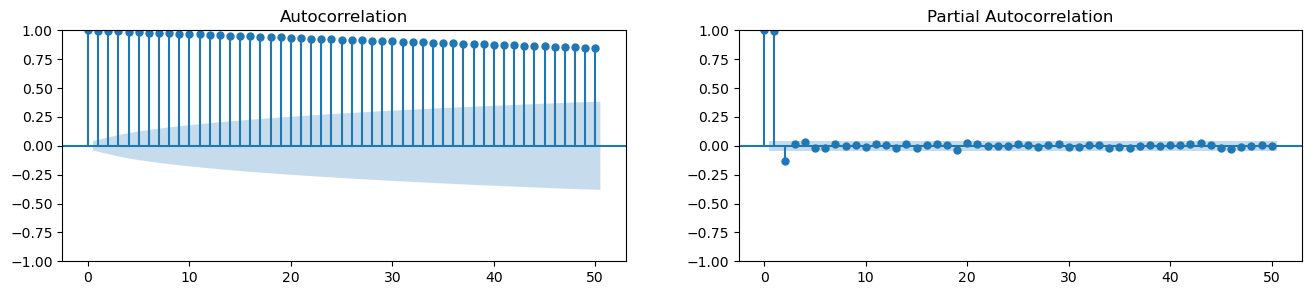

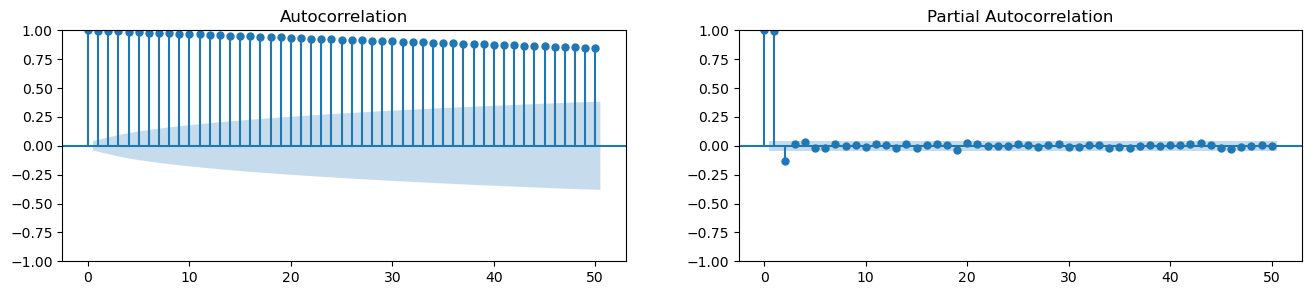

In [41]:
fig,axes = plt.subplots(1,2,figsize=(16,3),dpi=100)
plot_acf(dataset.Close.tolist(), lags=50, ax=axes[0])
plot_pacf(dataset.Close.tolist(), lags=50, ax=axes[1])

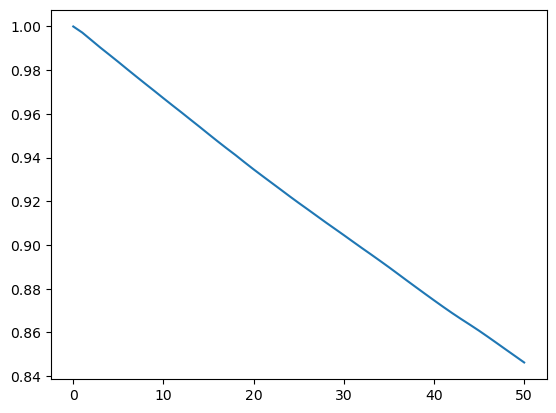

In [42]:
plt.plot(acf(dataset["Close"],nlags=50));

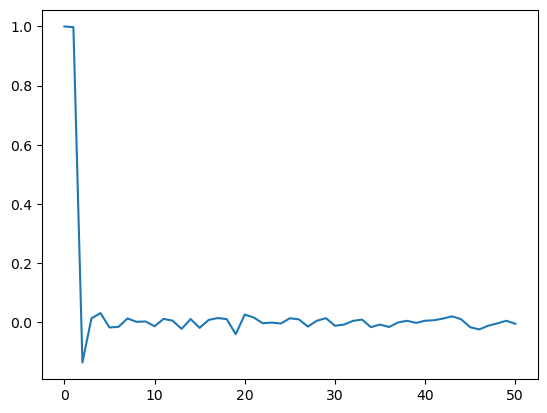

In [44]:
plt.plot(pacf(dataset["Close"], nlags=50))

In [45]:
dummyDate.to_csv("TataCofee.csv", index=False)